##Data preprocessing

In [21]:
# Read the datasets
import pandas as pd

tesla_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/[Code] Models/[Dataset] Generated datasets/tesla-final.csv')
oracle_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/[Code] Models/[Dataset] Generated datasets/oracle-final.csv')
pfizer_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/[Code] Models/[Dataset] Generated datasets/pfizer-final.csv')
shell_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/[Code] Models/[Dataset] Generated datasets/shell-final.csv')
tencent_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/[DS] Seminarska/[Code] Models/[Dataset] Generated datasets/tencent-final.csv')

In [22]:
print(tesla_df.head())
print(oracle_df.head())
print(pfizer_df.head())
print(shell_df.head())
print(tencent_df.head())

         date        Open        High         Low       Close   Adj Close  \
0  2023-08-28  242.580002  244.380005  235.350006  238.820007  238.820007   
1  2023-08-30  254.199997  260.510010  250.589996  256.899994  256.899994   
2  2023-09-01  257.260010  259.079987  242.009995  245.009995  245.009995   
3  2023-09-07  245.070007  252.809998  243.270004  251.490005  251.490005   
4  2023-09-08  251.220001  256.519989  246.669998  248.500000  248.500000   

      Volume  environment_negative_percentage  government_negative_percentage  \
0  107673700                              NaN                             NaN   
1  121988400                              NaN                             NaN   
2  132272500                              0.0                             NaN   
3  115312900                              NaN                             NaN   
4  118367700                              0.0                             NaN   

   neutral_negative_percentage  social_negative_pe

In [23]:
# Add ESG indexes in the previous datasets
tesla_df['e_score'] = 3.31
tesla_df['s_score'] = 14.08
tesla_df['g_score'] = 7.85

oracle_df['e_score'] = 0.5
oracle_df['s_score'] = 7.79
oracle_df['g_score'] = 5.6

pfizer_df['e_score'] = 2.1
pfizer_df['s_score'] = 12.9
pfizer_df['g_score'] = 9.6

shell_df['e_score'] = 0.0 # No data for SHELL
shell_df['s_score'] = 0.0
shell_df['g_score'] = 0.0

tencent_df['e_score'] = 2.4
tencent_df['s_score'] = 9.8
tencent_df['g_score'] = 7.1

In [24]:
tesla_df.head(10)

,date,Open,High,Low,Close,Adj Close,Volume,environment_negative_percentage,government_negative_percentage,neutral_negative_percentage,social_negative_percentage,environment_positive_percentage,government_positive_percentage,neutral_positive_percentage,social_positive_percentage,e_score,s_score,g_score
0,2023-08-28,242.580002,244.380005,235.350006,238.820007,238.820007,107673700,NaN,NaN,NaN,100.0,NaN,NaN,NaN,0.0,3.31,14.08,7.85
1,2023-08-30,254.199997,260.510010,250.589996,256.899994,256.899994,121988400,NaN,NaN,100.0,0.0,NaN,NaN,0.0,100.0,3.31,14.08,7.85
2,2023-09-01,257.260010,259.079987,242.009995,245.009995,245.009995,132272500,0.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,3.31,14.08,7.85
3,2023-09-07,245.070007,252.809998,243.270004,251.490005,251.490005,115312900,NaN,NaN,NaN,0.0,NaN,NaN,NaN,100.0,3.31,14.08,7.85
4,2023-09-08,251.220001,256.519989,246.669998,248.500000,248.500000,118367700,0.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,3.31,14.08,7.85
5,2023-09-13,270.070007,274.980011,268.100006,271.299988,271.299988,111673700,NaN,NaN,NaN,100.0,NaN,NaN,NaN,0.0,3.31,14.08,7.85
6,2023-09-14,271.320007,276.709991,270.420013,276.040009,276.040009,107709800,NaN,NaN,0.0,NaN,NaN,NaN,100.0,NaN,3.31,14.08,7.85
7,2023-10-12,262.920013,265.410004,256.630005,258.869995,258.869995,111508100,NaN,NaN,NaN,100.0,NaN,NaN,NaN,0.0,3.31,14.08,7.85
8,2023-10-23,210.000000,216.979996,202.509995,212.080002,212.080002,150683400,NaN,100.0,NaN,NaN,NaN,0.0,NaN,NaN,3.31,14.08,7.85
9,2023-10-31,196.119995,202.800003,194.070007,200.839996,200.839996,118068300,NaN,0.0,NaN,NaN,NaN,100.0,NaN,NaN,3.31,14.08,7.85


In [25]:
tesla_df.columns

Index(['date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'environment_negative_percentage', 'government_negative_percentage',
       'neutral_negative_percentage', 'social_negative_percentage',
       'environment_positive_percentage', 'government_positive_percentage',
       'neutral_positive_percentage', 'social_positive_percentage', 'e_score',
       's_score', 'g_score'],
      dtype='object')

In [26]:
# Insert libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [31]:
# Concatenate the datasets
combined_df = pd.concat([tesla_df, oracle_df, pfizer_df, tencent_df], axis=0)

# Optionally reset the index if needed
combined_df.reset_index(drop=True, inplace=True)

In [32]:
combined_df

,date,Open,High,Low,Close,Adj Close,Volume,environment_negative_percentage,government_negative_percentage,neutral_negative_percentage,social_negative_percentage,environment_positive_percentage,government_positive_percentage,neutral_positive_percentage,social_positive_percentage,e_score,s_score,g_score
0,2023-08-28,242.580002,244.380005,235.350006,238.820007,238.820007,107673700.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,0.0,3.31,14.08,7.85
1,2023-08-30,254.199997,260.510010,250.589996,256.899994,256.899994,121988400.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0,100.0,3.31,14.08,7.85
2,2023-09-01,257.260010,259.079987,242.009995,245.009995,245.009995,132272500.0,0.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,3.31,14.08,7.85
3,2023-09-07,245.070007,252.809998,243.270004,251.490005,251.490005,115312900.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,100.0,3.31,14.08,7.85
4,2023-09-08,251.220001,256.519989,246.669998,248.500000,248.500000,118367700.0,0.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,3.31,14.08,7.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2024-07-29,359.799988,362.000000,353.799988,358.200012,358.200012,12872249.0,NaN,NaN,100.0,NaN,NaN,NaN,0.0,NaN,2.40,9.80,7.10
250,2024-08-13,376.000000,380.600006,375.600006,378.600006,378.600006,13590391.0,NaN,NaN,NaN,50.0,NaN,NaN,NaN,50.0,2.40,9.80,7.10
251,2024-08-14,378.600006,379.399994,369.399994,373.799988,373.799988,18692686.0,NaN,NaN,NaN,40.0,NaN,NaN,NaN,60.0,2.40,9.80,7.10
252,2024-08-15,366.200012,374.799988,364.200012,368.399994,368.399994,21443850.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,100.0,2.40,9.80,7.10


In [35]:
# Convert the 'date' column to datetime format
combined_df['date'] = pd.to_datetime(combined_df['date'])

# Sort the DataFrame by the 'date' column
combined_df = combined_df.sort_values(by='date')

# Optionally reset the index after sorting
combined_df.reset_index(drop=True, inplace=True)

In [39]:
combined_df['date'].head(40)

,date
0,2023-08-28
1,2023-08-28
2,2023-08-29
3,2023-08-30
4,2023-09-01
5,2023-09-05
6,2023-09-06
7,2023-09-06
8,2023-09-07
9,2023-09-07


##Data visualizations

<ipython-input-44-8f6edcf04688>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='date', data=combined_df, palette='viridis')


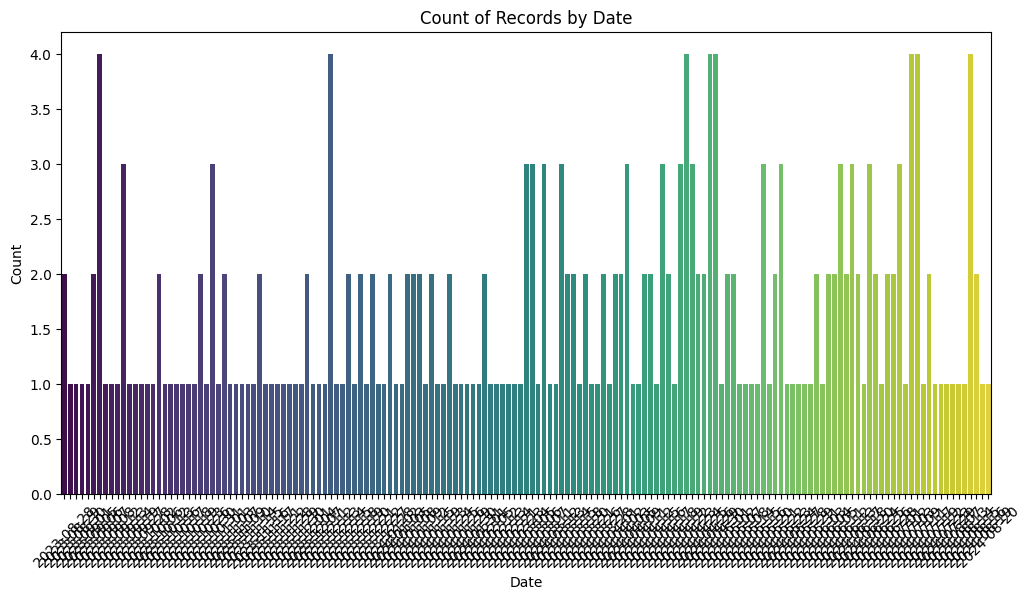

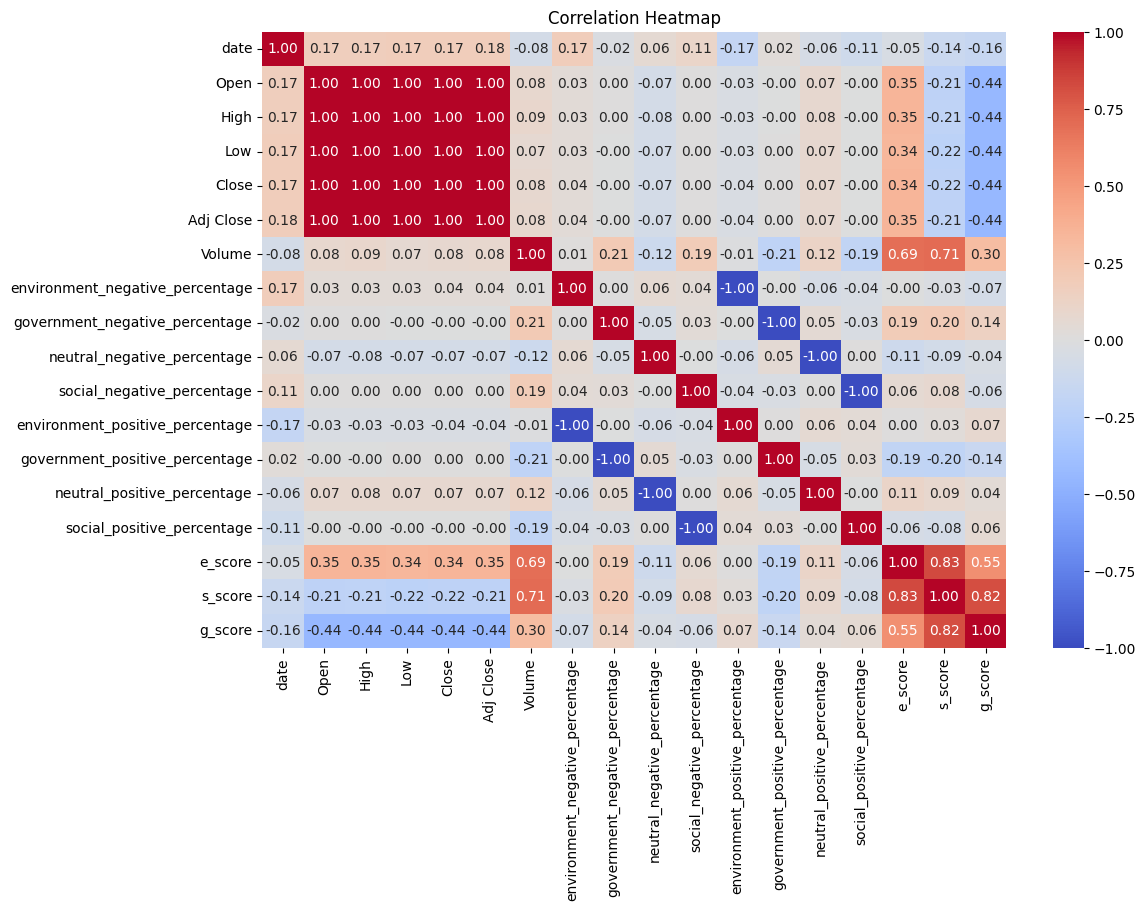

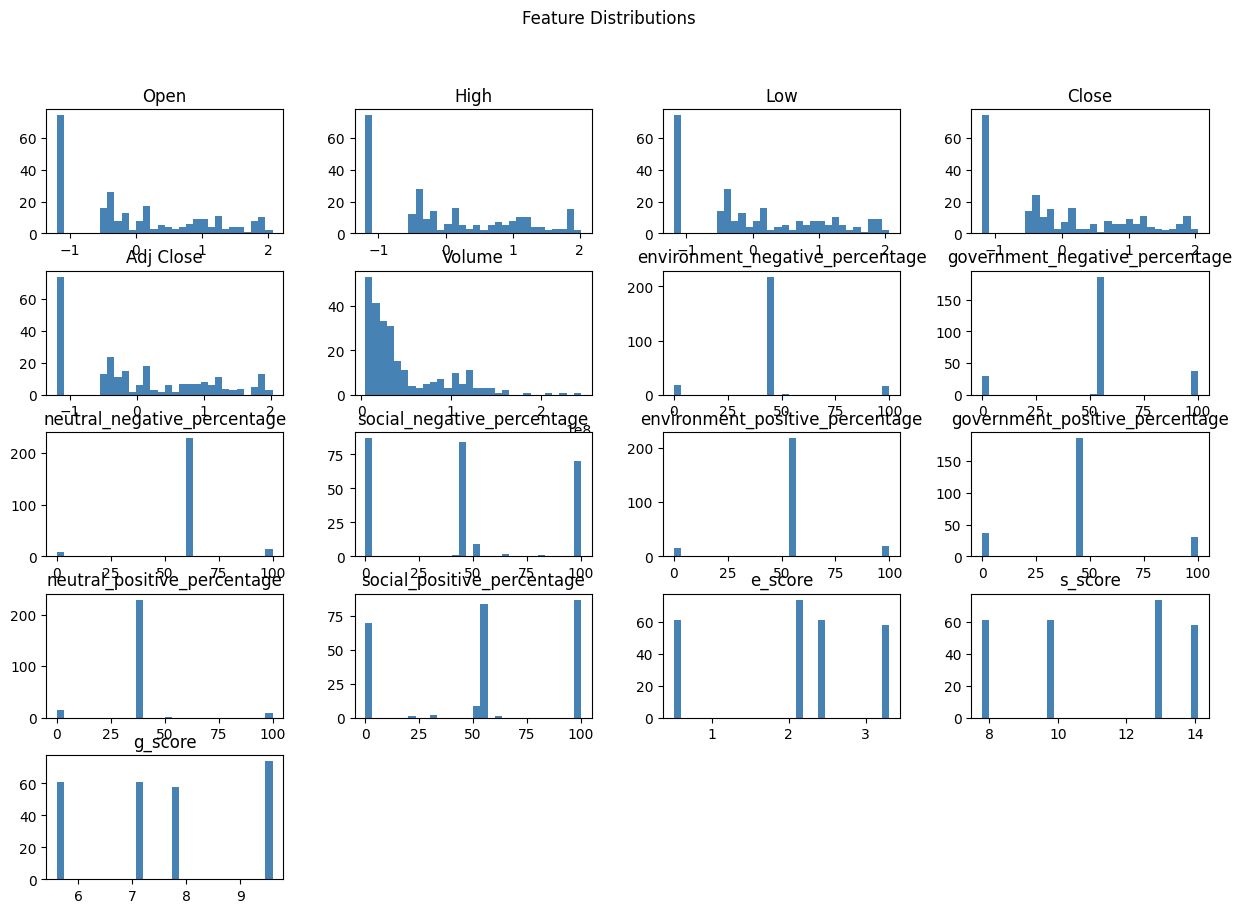

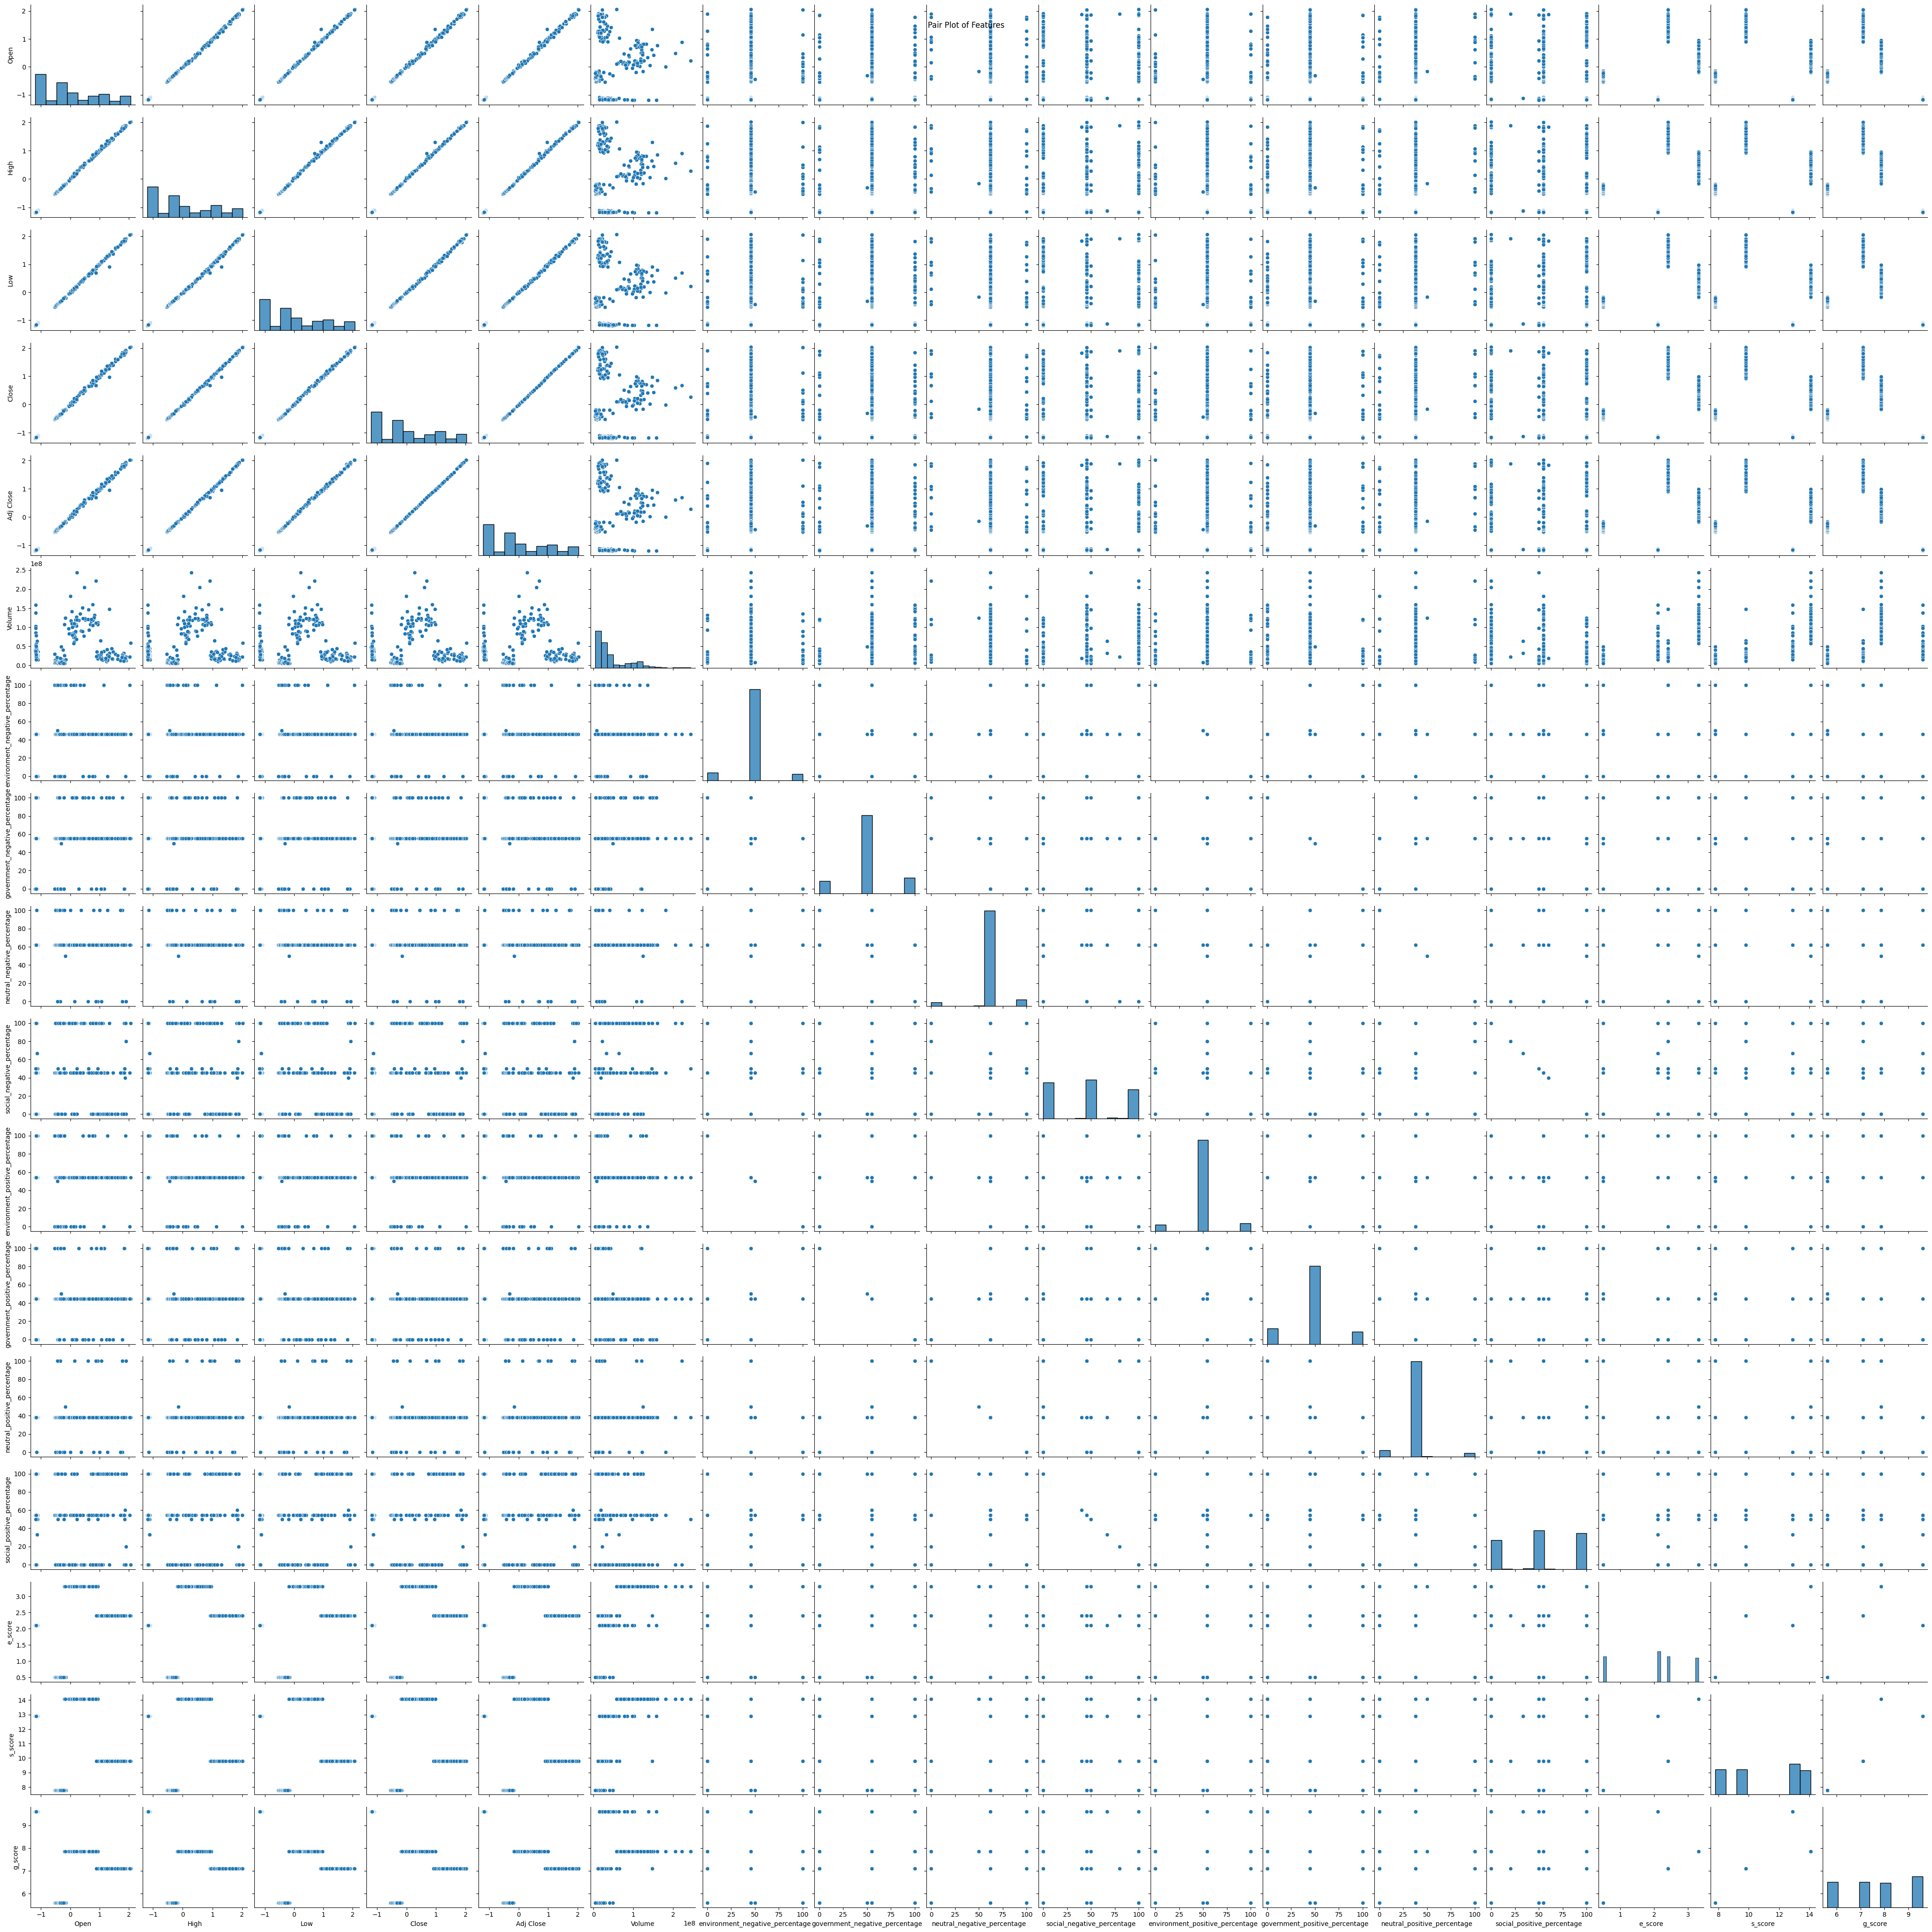

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Count Plot of Date Occurrences
plt.figure(figsize=(12, 6))
sns.countplot(x='date', data=combined_df, palette='viridis')
plt.xticks(rotation=45)
plt.title('Count of Records by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

# 2. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(combined_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# 3. Feature Distributions
features = ['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
            'environment_negative_percentage', 'government_negative_percentage',
            'neutral_negative_percentage', 'social_negative_percentage',
            'environment_positive_percentage', 'government_positive_percentage',
            'neutral_positive_percentage', 'social_positive_percentage',
            'e_score', 's_score', 'g_score']

combined_df[features].hist(bins=30, figsize=(15, 10), grid=False, color='steelblue')
plt.suptitle('Feature Distributions')
plt.show()

# 4. Pair Plot
sns.pairplot(combined_df[features])
plt.suptitle('Pair Plot of Features')
plt.show()


##Model - XGBoost
Prediction of e_index

In [40]:
combined_df

,date,Open,High,Low,Close,Adj Close,Volume,environment_negative_percentage,government_negative_percentage,neutral_negative_percentage,social_negative_percentage,environment_positive_percentage,government_positive_percentage,neutral_positive_percentage,social_positive_percentage,e_score,s_score,g_score
0,2023-08-28,242.580002,244.380005,235.350006,238.820007,238.820007,107673700.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,0.0,3.31,14.08,7.85
1,2023-08-28,36.439999,36.520000,36.029999,36.209999,34.193111,15101900.0,NaN,100.0,NaN,NaN,NaN,0.0,NaN,NaN,2.10,12.90,9.60
2,2023-08-29,120.949997,121.209999,118.529999,120.650002,119.024872,11920500.0,NaN,0.0,NaN,NaN,NaN,100.0,NaN,NaN,0.50,7.79,5.60
3,2023-08-30,254.199997,260.510010,250.589996,256.899994,256.899994,121988400.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0,100.0,3.31,14.08,7.85
4,2023-09-01,257.260010,259.079987,242.009995,245.009995,245.009995,132272500.0,0.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,3.31,14.08,7.85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,2024-08-15,205.020004,215.880005,204.820007,214.139999,214.139999,89848500.0,NaN,NaN,100.0,100.0,NaN,NaN,0.0,0.0,3.31,14.08,7.85
250,2024-08-16,211.149994,219.800003,210.800003,216.119995,216.119995,88765100.0,NaN,NaN,NaN,100.0,NaN,NaN,NaN,0.0,3.31,14.08,7.85
251,2024-08-16,28.650000,28.650000,27.850000,28.299999,28.299999,50332900.0,NaN,100.0,NaN,NaN,NaN,0.0,NaN,NaN,2.10,12.90,9.60
252,2024-08-19,217.070007,222.979996,214.089996,222.720001,222.720001,76435200.0,100.0,NaN,NaN,100.0,0.0,NaN,NaN,0.0,3.31,14.08,7.85


In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import xgboost as xgb

# Handle missing values
imputer = SimpleImputer(strategy='mean')
combined_df.iloc[:, 7:-3] = imputer.fit_transform(combined_df.iloc[:, 7:-3])

# Feature scaling
scaler = StandardScaler()
combined_df[['Open', 'High', 'Low', 'Close', 'Adj Close']] = scaler.fit_transform(combined_df[['Open', 'High', 'Low', 'Close', 'Adj Close']])

# Define features and target
X = combined_df.drop(columns=['date', 'e_score', 's_score', 'g_score'])
y = combined_df['e_score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model
model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=100, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)

In [42]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Predict the e_score for the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 0.0730241066801782
Mean Squared Error (MSE): 0.1710152227181044
Root Mean Squared Error (RMSE): 0.41353986835383166


##Model - XGBoost
Prediction of s_index

Mean Absolute Error (MAE): 0.17879765454460617
Mean Squared Error (MSE): 0.3142471331019017
Root Mean Squared Error (RMSE): 0.5605774996393467


<Figure size 1000x600 with 0 Axes>

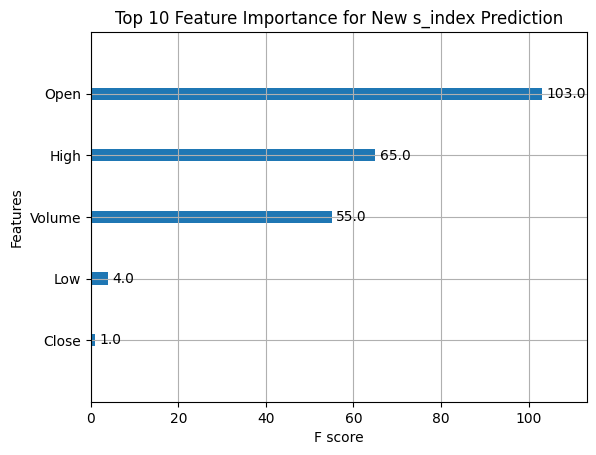

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np
import xgboost as xgb

# Define features and target for predicting s_index
X = combined_df.drop(columns=['date', 'e_score', 's_score', 'g_score'])
y = combined_df['s_score']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train XGBoost model with different parameters
model_s_new = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=150,        # Number of boosting rounds
    learning_rate=0.1,       # Step size shrinkage
    max_depth=6,             # Maximum depth of a tree
    min_child_weight=1,      # Minimum sum of instance weight (hessian) needed in a child
    subsample=0.9,           # Fraction of samples used for fitting each tree
    colsample_bytree=0.9,    # Fraction of features used for fitting each tree
    gamma=0.1,               # Regularization term
    random_state=42
)
model_s_new.fit(X_train, y_train)

# Predict the s_index for the test set
y_pred_s_new = model_s_new.predict(X_test)

# Calculate evaluation metrics
mae_s_new = mean_absolute_error(y_test, y_pred_s_new)
mse_s_new = mean_squared_error(y_test, y_pred_s_new)
rmse_s_new = np.sqrt(mse_s_new)

print(f"Mean Absolute Error (MAE): {mae_s_new}")
print(f"Mean Squared Error (MSE): {mse_s_new}")
print(f"Root Mean Squared Error (RMSE): {rmse_s_new}")

# Optional: Feature importance for the new s_index model
plt.figure(figsize=(10, 6))
xgb.plot_importance(model_s_new, max_num_features=10, importance_type='weight')
plt.title('Top 10 Feature Importance for New s_index Prediction')
plt.show()